In [223]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from geopy.distance import geodesic
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import time
from IPython.display import clear_output



In [274]:
# Load the dataset
df = pd.read_csv('train.csv')

# Set the random seed
np.random.seed(8659)

# Sample 100,000 rows
df = df.sample(n=100000)

In [225]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
209174,id2104500,2,2016-03-09 20:09:32,2016-03-09 20:33:18,5,-74.00,40.74,-73.96,40.67,N,1426
1296156,id1063788,2,2016-05-26 08:38:50,2016-05-26 08:51:19,1,-73.97,40.74,-73.99,40.75,N,749
136770,id1376921,1,2016-06-12 10:36:15,2016-06-12 10:50:21,1,-73.99,40.73,-74.00,40.71,N,846
219673,id1418169,2,2016-06-26 02:13:21,2016-06-26 02:16:28,1,-73.98,40.74,-73.98,40.73,N,187
218117,id2470055,2,2016-02-17 11:33:38,2016-02-17 11:39:45,1,-73.98,40.73,-73.99,40.73,N,367


In [226]:

df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,1.53,1.66,-73.97,40.75,-73.97,40.75,942.74
std,0.50,1.31,0.04,0.04,0.04,0.04,3083.43
min,1.00,0.00,-77.44,35.31,-79.52,35.17,1.00
25%,1.00,1.00,-73.99,40.74,-73.99,40.74,394.00
50%,2.00,1.00,-73.98,40.75,-73.98,40.75,661.00
75%,2.00,2.00,-73.97,40.77,-73.96,40.77,1073.00
max,2.00,6.00,-70.51,42.46,-70.51,43.92,86369.00


In [227]:

df.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [228]:


## Droping rows with nan values
df.dropna(inplace=True)


In [229]:
null_data = df.isnull().sum()
print("null data counts:")
print(null_data)

null data counts:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64


In [230]:
df.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
209174,id2104500,2,2016-03-09 20:09:32,2016-03-09 20:33:18,5,-74.00,40.74,-73.96,40.67,N,1426
1296156,id1063788,2,2016-05-26 08:38:50,2016-05-26 08:51:19,1,-73.97,40.74,-73.99,40.75,N,749
136770,id1376921,1,2016-06-12 10:36:15,2016-06-12 10:50:21,1,-73.99,40.73,-74.00,40.71,N,846
219673,id1418169,2,2016-06-26 02:13:21,2016-06-26 02:16:28,1,-73.98,40.74,-73.98,40.73,N,187
218117,id2470055,2,2016-02-17 11:33:38,2016-02-17 11:39:45,1,-73.98,40.73,-73.99,40.73,N,367


In [231]:

df = df[df['trip_duration'] >= 0]


In [232]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [233]:

df['month'] = df.pickup_datetime.dt.month

df['weekday'] = df['pickup_datetime'].dt.strftime('%A')

df['weekday_num'] = df.pickup_datetime.dt.weekday

df['pickup_hour'] = df.pickup_datetime.dt.hour

In [234]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,month,weekday,weekday_num,pickup_hour
209174,id2104500,2,2016-03-09 20:09:32,2016-03-09 20:33:18,5,-74.00,40.74,-73.96,40.67,N,1426,3,Wednesday,2,20
1296156,id1063788,2,2016-05-26 08:38:50,2016-05-26 08:51:19,1,-73.97,40.74,-73.99,40.75,N,749,5,Thursday,3,8
136770,id1376921,1,2016-06-12 10:36:15,2016-06-12 10:50:21,1,-73.99,40.73,-74.00,40.71,N,846,6,Sunday,6,10
219673,id1418169,2,2016-06-26 02:13:21,2016-06-26 02:16:28,1,-73.98,40.74,-73.98,40.73,N,187,6,Sunday,6,2
218117,id2470055,2,2016-02-17 11:33:38,2016-02-17 11:39:45,1,-73.98,40.73,-73.99,40.73,N,367,2,Wednesday,2,11


In [235]:
df.dtypes

id                            object
vendor_id                      int64
pickup_datetime       datetime64[ns]
dropoff_datetime      datetime64[ns]
passenger_count                int64
pickup_longitude             float64
pickup_latitude              float64
dropoff_longitude            float64
dropoff_latitude             float64
store_and_fwd_flag            object
trip_duration                  int64
month                          int64
weekday                       object
weekday_num                    int64
pickup_hour                    int64
dtype: object

In [236]:
df.value_counts()

id         vendor_id  pickup_datetime      dropoff_datetime     passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  store_and_fwd_flag  trip_duration  month  weekday   weekday_num  pickup_hour
id0000063  2          2016-04-24 10:38:59  2016-04-24 10:46:34  1                -73.96            40.78            -73.98             40.77             N                   455            4      Sunday    6            10             1
id2660312  2          2016-06-24 17:38:43  2016-06-24 18:07:03  1                -73.95            40.77            -73.99             40.74             N                   1700           6      Friday    4            17             1
id2661341  1          2016-05-19 19:37:45  2016-05-19 19:59:57  1                -74.01            40.72            -74.01             40.72             N                   1332           5      Thursday  3            19             1
id2661334  1          2016-02-14 03:54:20  2016-02-14 04:09:01  1

In [237]:
# Creating dummy variables for store_and_fwd_flag within df2 and droping the first level
df = pd.get_dummies(df, columns=['store_and_fwd_flag'], drop_first=True)

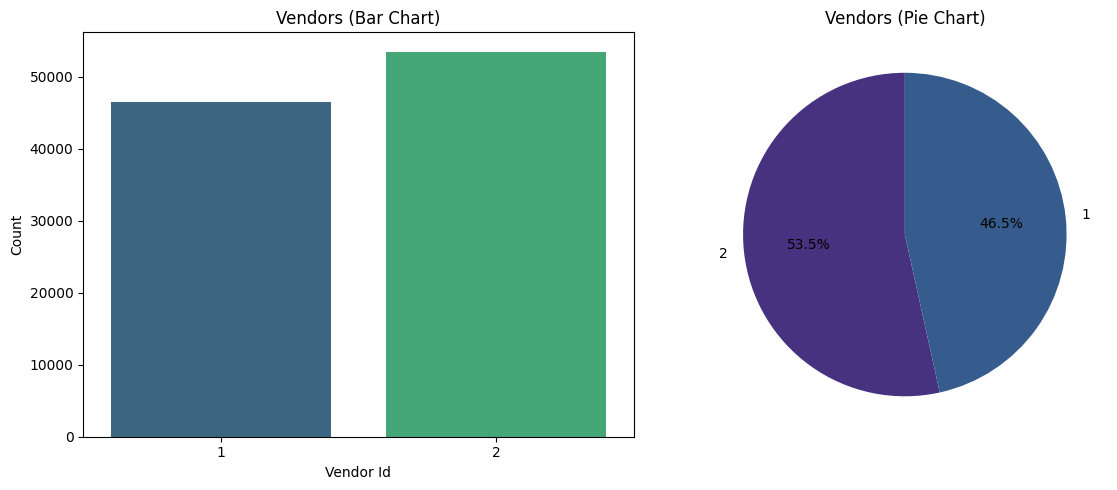

In [238]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot a bar chart in the first subplot
sns.countplot(data=df, x='vendor_id', ax=axes[0], palette='viridis')
axes[0].set_title('Vendors (Bar Chart)')
axes[0].set_xlabel('Vendor Id')
axes[0].set_ylabel('Count')

# Plot a pie chart in the second subplot
vendor_counts = df['vendor_id'].value_counts()
axes[1].pie(vendor_counts, labels=vendor_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis'))
axes[1].set_title('Vendors (Pie Chart)')

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()

In [239]:
# Converting 'passenger_count' to integers and then count the values
df['passenger_count'] = df['passenger_count'].astype(int)
passenger_count_counts = df['passenger_count'].value_counts()

# Seting the display format to suppress scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Display the value counts
print(passenger_count_counts)

1    70883
2    14403
5     5316
3     4096
6     3289
4     2006
0        7
Name: passenger_count, dtype: int64


In [240]:
df = df[df['passenger_count'] > 0]

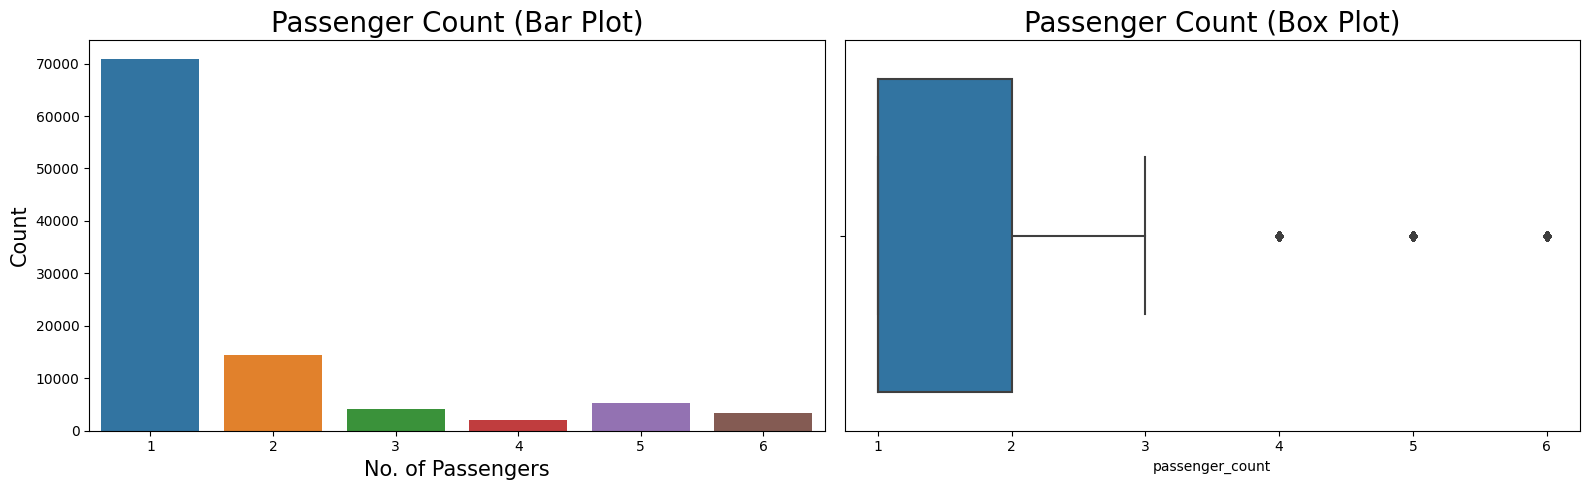

In [241]:
# Create a single figure with two subplots side by side
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Bar plot for passenger count
sns.countplot(data=df, x='passenger_count', ax=axes[0])
axes[0].set_ylabel("Count", fontsize=15)
axes[0].set_xlabel("No. of Passengers", fontsize=15)
axes[0].set_title('Passenger Count (Bar Plot)', fontsize=20)

# Box plot for passenger count
sns.boxplot(data=df, x='passenger_count', orient='h', ax=axes[1])
axes[1].set_title('Passenger Count (Box Plot)', fontsize=20)

# Adjust layout
fig.tight_layout()

# Show the plots
plt.show()



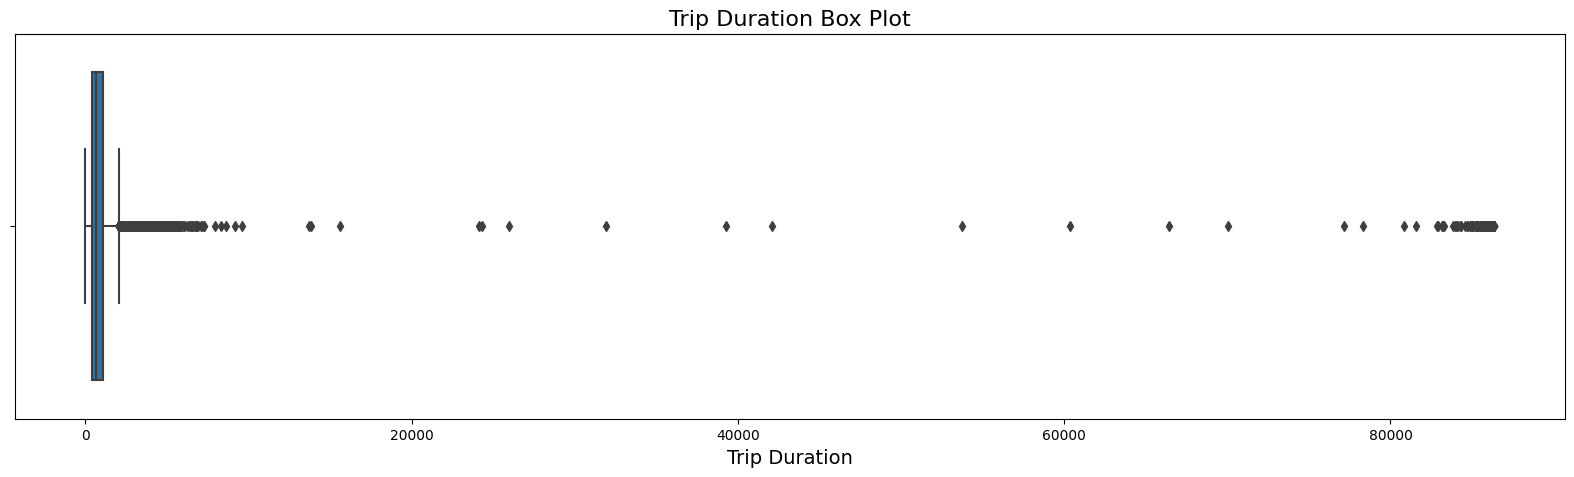

In [242]:
# Replace 'df' with your actual DataFrame
plt.figure(figsize=(20, 5))
sns.boxplot(x=df['trip_duration'])
plt.title('Trip Duration Box Plot', fontsize=16)
plt.xlabel('Trip Duration', fontsize=14)
plt.show()


In [243]:
bin_edges = np.arange(0, df['trip_duration'].max(), 3600)

# Group and count trips based on trip duration bins
trip_counts = df['trip_duration'].groupby(pd.cut(df['trip_duration'], bin_edges)).count()

# Print the trip counts
print(trip_counts)

trip_duration
(0, 3600]         99170
(3600, 7200]        680
(7200, 10800]         7
(10800, 14400]        2
(14400, 18000]        1
(18000, 21600]        0
(21600, 25200]        2
(25200, 28800]        1
(28800, 32400]        1
(32400, 36000]        0
(36000, 39600]        1
(39600, 43200]        1
(43200, 46800]        0
(46800, 50400]        0
(50400, 54000]        1
(54000, 57600]        0
(57600, 61200]        1
(61200, 64800]        0
(64800, 68400]        1
(68400, 72000]        1
(72000, 75600]        0
(75600, 79200]        2
(79200, 82800]        2
Name: trip_duration, dtype: int64


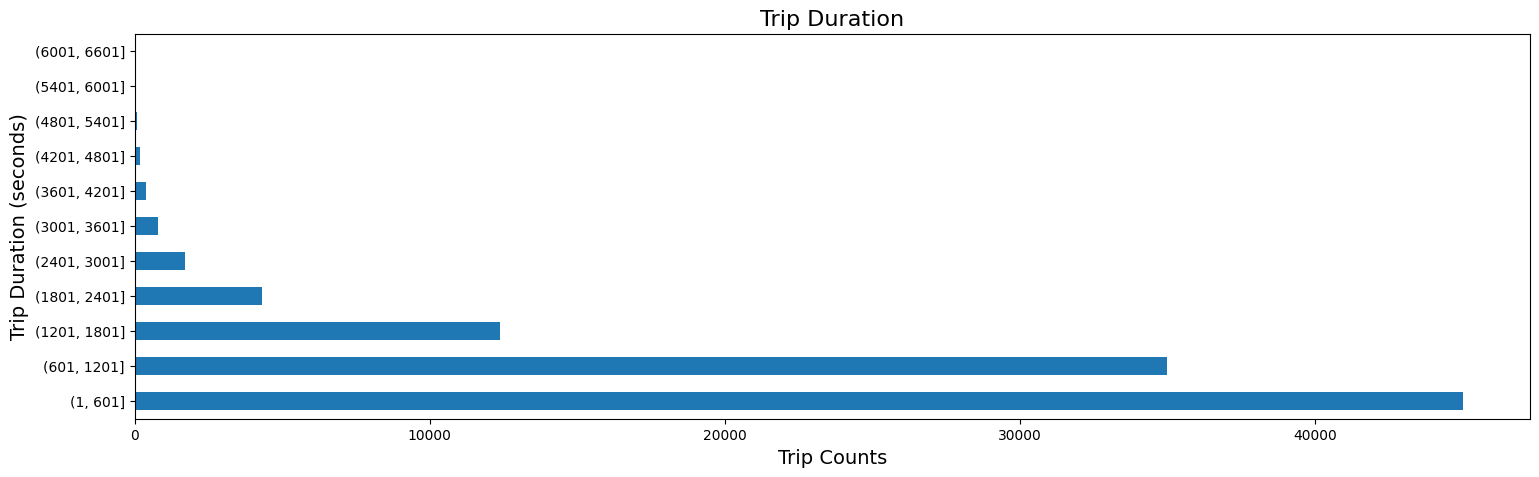

In [244]:
# Replace 'df' with your actual DataFrame
bin_labels = np.arange(1, 7200, 600)
trip_duration_counts = df['trip_duration'].groupby(pd.cut(df['trip_duration'], bin_labels)).count()

# Create a horizontal bar plot
plt.figure(figsize=(18, 5))
trip_duration_counts.plot(kind='barh')
plt.title('Trip Duration', fontsize=16)
plt.xlabel('Trip Counts', fontsize=14)
plt.ylabel('Trip Duration (seconds)', fontsize=14)
plt.show()

In [245]:
def clock(ax, radii, title, color):
    N = 24  # Number of hours in a day
    bottom = 2  # Bottom position for the bars

    # Create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # Width of each bin on the plot
    width = (2 * np.pi) / N

    # Create bars on the polar plot
    bars = ax.bar(theta, radii, width=width, bottom=bottom, color=color, edgecolor="#999999")

    # Set the label position to start from the top and go clockwise
    ax.set_theta_zero_location("N")  # "N" stands for North (top)
    ax.set_theta_direction(-1)  # Clockwise direction

    # Set the label ticks and format them as hours
    ax.set_xticks(theta)
    ticks = ["{}:00".format(x) for x in range(24)]
    ax.set_xticklabels(ticks)

    # Set the title of the polar plot
    ax.set_title(title)


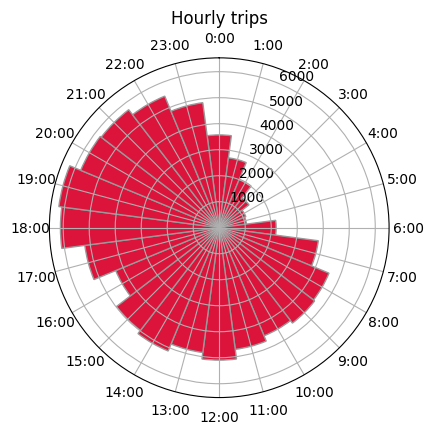

In [246]:
plt.figure(figsize=(15, 15))
ax = plt.subplot(3, 3, 1, polar=True)

# Calculate the number of trips per hour and convert it to an array
radii = df['pickup_hour'].value_counts().sort_index().values

title = "Hourly trips"
clock(ax, radii, title, "#dc143c")

plt.show()


In [247]:
pip install folium

In [248]:
import folium
from folium.plugins import HeatMap
pickup_map = folium.Map(location=[df['pickup_latitude'].mean(), df['pickup_longitude'].mean()], zoom_start=12)
pickup_map.add_child(folium.plugins.HeatMap(df[['pickup_latitude', 'pickup_longitude']].values, radius=8))
pickup_map.save("pickup_Geo_map.html")
dropoff_map = folium.Map(location=[df['dropoff_latitude'].mean(), df['dropoff_longitude'].mean()], zoom_start=12)
dropoff_map.add_child(folium.plugins.HeatMap(df[['dropoff_latitude', 'dropoff_longitude']].values, radius=8))
dropoff_map.save("dropoff_Geo_map.html")
dropoff_map.save("dropoff_Geo_map.html")

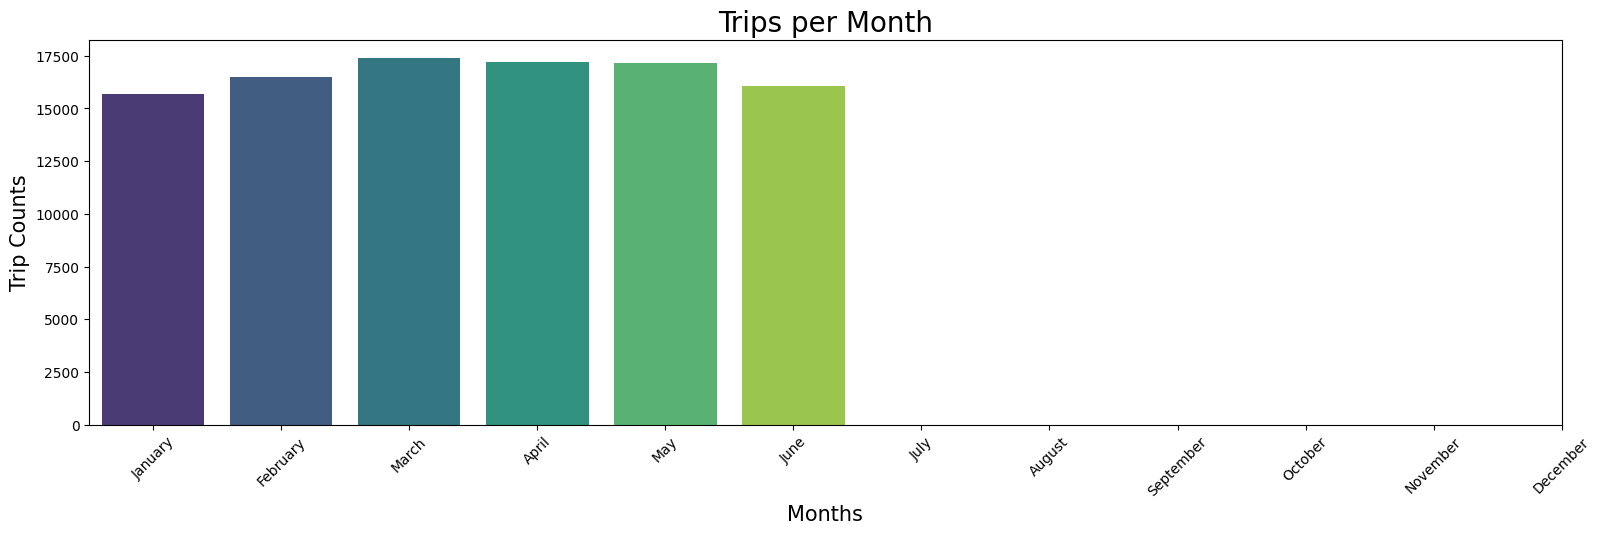

In [249]:
# Create a figure and axes
plt.figure(figsize=(19, 5))

# Create a countplot with custom month labels
ax = sns.countplot(data=df, x='month', palette='viridis')

# Set axis labels and title
ax.set_ylabel('Trip Counts', fontsize=15)
ax.set_xlabel('Months', fontsize=15)
ax.set_title('Trips per Month', fontsize=20)

# Specify the positions and labels for the x-axis ticks
month_positions = list(range(12))
month_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Set the custom tick positions and labels for the x-axis
ax.set_xticks(month_positions)
ax.set_xticklabels(month_labels, rotation=45)

plt.show()


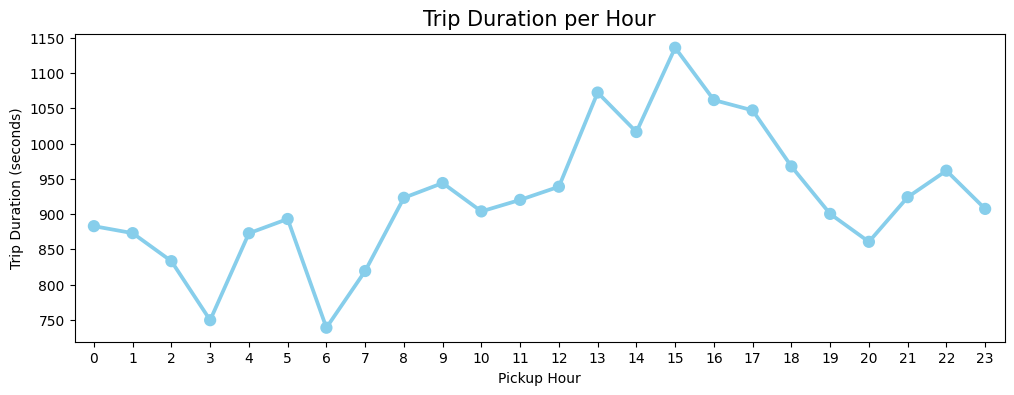

In [250]:
plt.figure(figsize=(12, 4))


group1 = df.groupby('pickup_hour')['trip_duration'].mean().reset_index()

# Create a point plot
point_plot = sns.pointplot(x='pickup_hour', y='trip_duration', data=group1, color='skyblue')

point_plot.set_ylabel('Trip Duration (seconds)', fontsize=10)
point_plot.set_xlabel('Pickup Hour', fontsize=10)
point_plot.set_title('Trip Duration per Hour', fontsize=15)

plt.show()

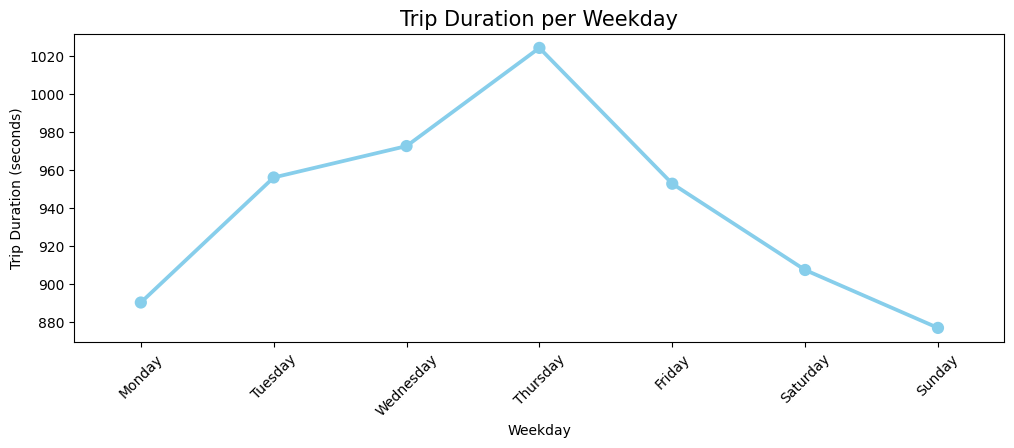

In [251]:
plt.figure(figsize=(12, 4))

# Group by weekday number and calculate the mean trip duration
group2 = df.groupby('weekday_num')['trip_duration'].mean().reset_index()

# Create a point plot
point_plot = sns.pointplot(x='weekday_num', y='trip_duration', data=group2, color='skyblue')

point_plot.set_ylabel('Trip Duration (seconds)', fontsize=10)
point_plot.set_xlabel('Weekday', fontsize=10)
point_plot.set_title('Trip Duration per Weekday', fontsize=15)

# Set x-axis labels to display the weekday names
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
point_plot.set_xticklabels(weekday_labels, rotation=45)

plt.show()

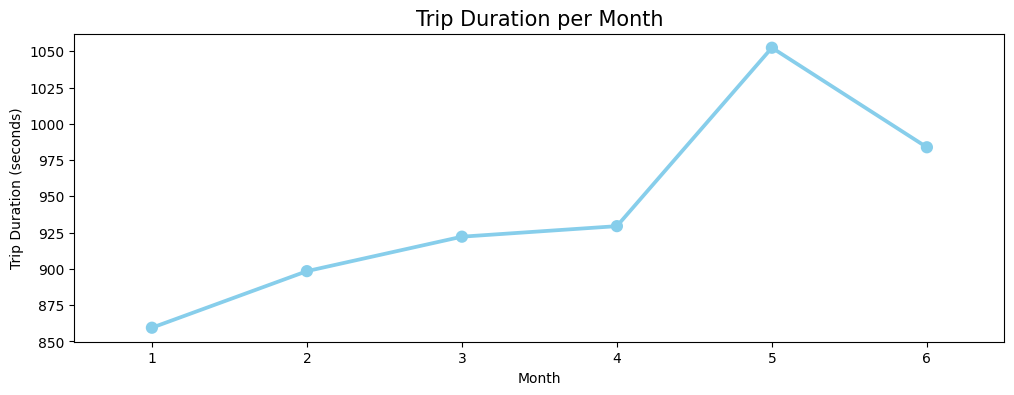

In [252]:
plt.figure(figsize=(12, 4))


group3 = df.groupby('month')['trip_duration'].mean().reset_index()

# Create a point plot
point_plot = sns.pointplot(x='month', y='trip_duration', data=group3, color='skyblue')

point_plot.set_ylabel('Trip Duration (seconds)', fontsize=10)
point_plot.set_xlabel('Month', fontsize=10)
point_plot.set_title('Trip Duration per Month', fontsize=15)

plt.show()

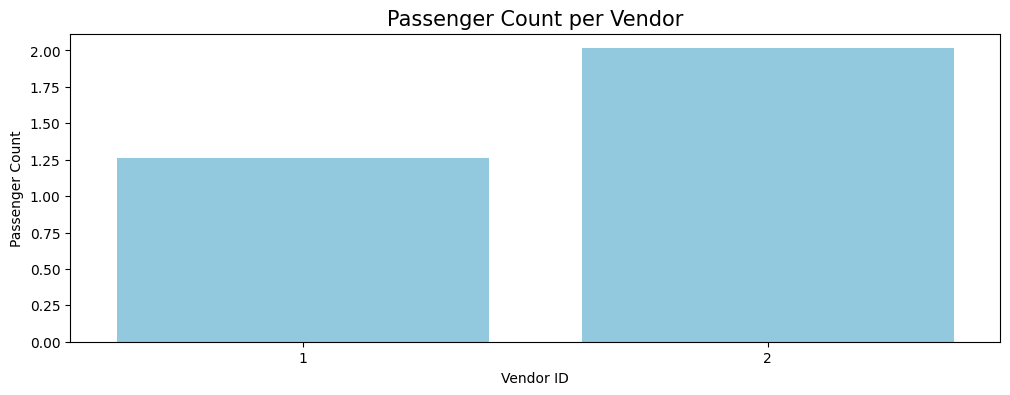

In [253]:

group9 = df.groupby('vendor_id')['passenger_count'].mean().reset_index()

plt.figure(figsize=(12, 4))

# Create a bar plot
bar_plot = sns.barplot(x='vendor_id', y='passenger_count', data=group9, color='skyblue')

bar_plot.set_ylabel('Passenger Count', fontsize=10)
bar_plot.set_xlabel('Vendor ID', fontsize=10)
bar_plot.set_title('Passenger Count per Vendor', fontsize=15)

plt.show()

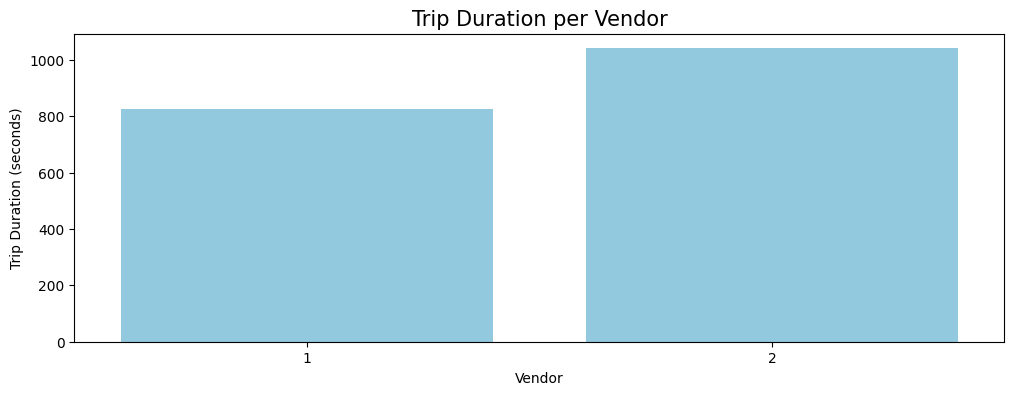

In [254]:

group4 = df.groupby('vendor_id')['trip_duration'].mean().reset_index()

plt.figure(figsize=(12, 4))

# Create a bar plot
bar_plot = sns.barplot(x='vendor_id', y='trip_duration', data=group4, color='skyblue')

bar_plot.set_ylabel('Trip Duration (seconds)', fontsize=10)
bar_plot.set_xlabel('Vendor', fontsize=10)
bar_plot.set_title('Trip Duration per Vendor', fontsize=15)

plt.show()

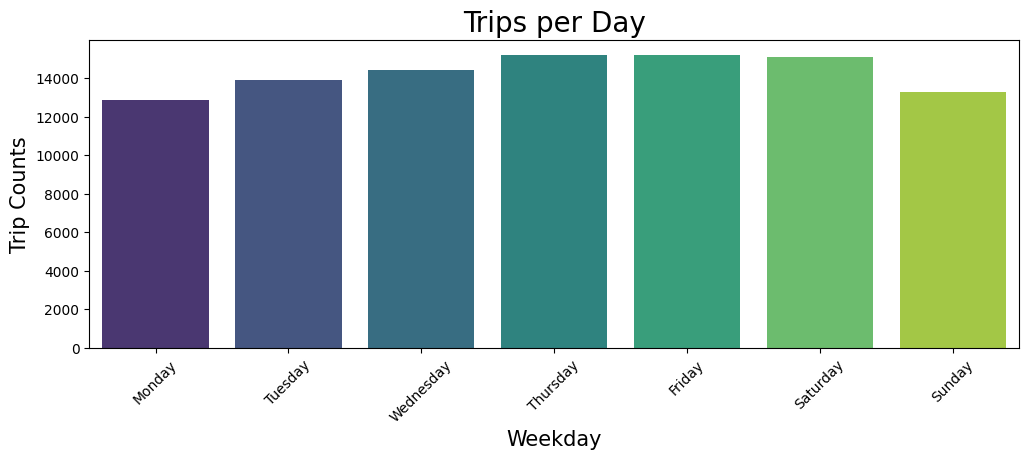

In [255]:
plt.figure(figsize=(12, 4))

# Create a countplot with custom x-axis labels
count_plot = sns.countplot(data=df, x='weekday_num', palette='viridis')

count_plot.set_xlabel('Weekday', fontsize=15)
count_plot.set_ylabel('Trip Counts', fontsize=15)
count_plot.set_title('Trips per Day', fontsize=20)

# Set the x-axis labels to display weekdays
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
count_plot.set_xticklabels(weekday_labels, rotation=45)

plt.show()


In [256]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Apply label encoding to the 'vendor_id' column and overwrite it
df['vendor_id'] = label_encoder.fit_transform(df['vendor_id'])



In [257]:
df.dtypes

id                              object
vendor_id                        int64
pickup_datetime         datetime64[ns]
dropoff_datetime        datetime64[ns]
passenger_count                  int64
pickup_longitude               float64
pickup_latitude                float64
dropoff_longitude              float64
dropoff_latitude               float64
trip_duration                    int64
month                            int64
weekday                         object
weekday_num                      int64
pickup_hour                      int64
store_and_fwd_flag_Y             uint8
dtype: object

In [258]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday,weekday_num,pickup_hour,store_and_fwd_flag_Y
209174,id2104500,1,2016-03-09 20:09:32,2016-03-09 20:33:18,5,-74.00,40.74,-73.96,40.67,1426,3,Wednesday,2,20,0
1296156,id1063788,1,2016-05-26 08:38:50,2016-05-26 08:51:19,1,-73.97,40.74,-73.99,40.75,749,5,Thursday,3,8,0
136770,id1376921,0,2016-06-12 10:36:15,2016-06-12 10:50:21,1,-73.99,40.73,-74.00,40.71,846,6,Sunday,6,10,0
219673,id1418169,1,2016-06-26 02:13:21,2016-06-26 02:16:28,1,-73.98,40.74,-73.98,40.73,187,6,Sunday,6,2,0
218117,id2470055,1,2016-02-17 11:33:38,2016-02-17 11:39:45,1,-73.98,40.73,-73.99,40.73,367,2,Wednesday,2,11,0


In [259]:
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
normalizing_column = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
df[normalizing_column] = scaler.fit_transform(df[normalizing_column])



In [260]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Define the columns to be standardized
columns_to_standardize = ['trip_duration']

# Apply standardization to the selected columns
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])



In [261]:
from scipy import stats

# Select the numerical columns for outlier detection
numerical_columns = ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'trip_duration']

# Calculate the absolute Z-scores for each numerical column
z_scores = np.abs(stats.zscore(df[numerical_columns]))

# Define a threshold for considering data points as outliers (adjust as needed)
z_threshold = 3.0

# Find rows with outliers
outliers = (z_scores > z_threshold).any(axis=1)

# Remove rows with outliers
df_clean = df[~outliers]

# Display the cleaned DataFrame
df_clean.head()

df = df_clean

# Display the cleaned DataFrame
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday,weekday_num,pickup_hour,store_and_fwd_flag_Y
209174,id2104500,1,2016-03-09 20:09:32,2016-03-09 20:33:18,5,0.50,0.76,0.62,0.63,0.16,3,Wednesday,2,20,0
1296156,id1063788,1,2016-05-26 08:38:50,2016-05-26 08:51:19,1,0.50,0.76,0.61,0.64,-0.06,5,Thursday,3,8,0
136770,id1376921,0,2016-06-12 10:36:15,2016-06-12 10:50:21,1,0.50,0.76,0.61,0.63,-0.03,6,Sunday,6,10,0
219673,id1418169,1,2016-06-26 02:13:21,2016-06-26 02:16:28,1,0.50,0.76,0.62,0.64,-0.25,6,Sunday,6,2,0
218117,id2470055,1,2016-02-17 11:33:38,2016-02-17 11:39:45,1,0.50,0.76,0.61,0.64,-0.19,2,Wednesday,2,11,0


In [262]:
df.shape

(95944, 15)

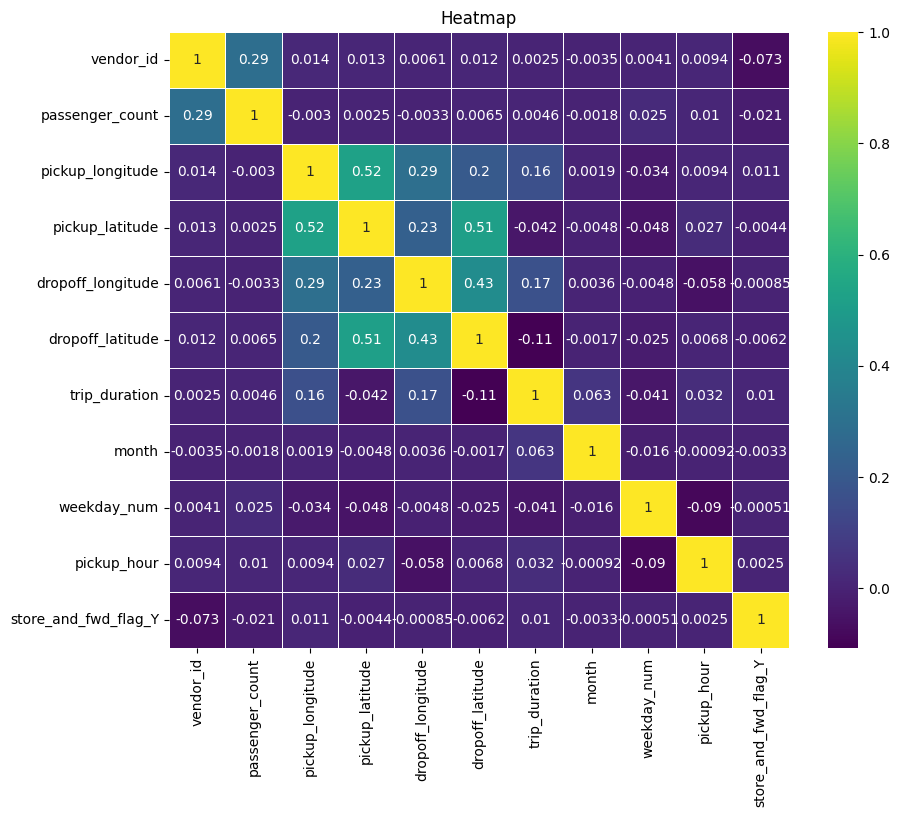

In [263]:
# Select only the numeric columns in your DataFrame
df2_matrix_columns = df.select_dtypes(include=['number'])
df2_matrix = df2_matrix_columns.corr()

# Creating a heatmap with a different color palette ('viridis' in this case)
plt.figure(figsize=(10, 8))
sns.heatmap(df2_matrix, annot=True, cmap='viridis', linewidths=0.7)
plt.title('Heatmap')
plt.show()

In [264]:
#X = df[predictors]
#y = df[target]
#y = df.iloc[:,9].values
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7294)


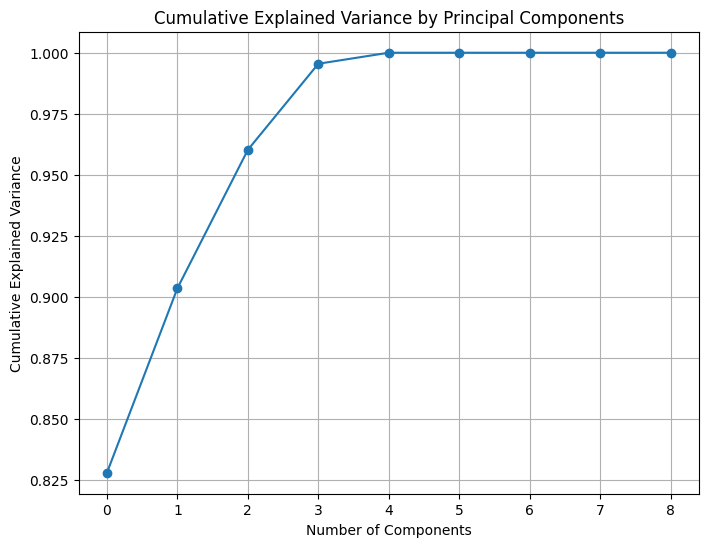

In [265]:
from sklearn.decomposition import PCA

# Fit PCA to your training data
pca = PCA()
pca.fit(X_train)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Create a plot to visualize the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Cumulative Explained Variance by Principal Components")
plt.grid()
plt.show()

In [266]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score



predictors = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'month', 'weekday_num', 'pickup_hour']
target = 'trip_duration'


X = df[predictors]
y = df.iloc[:,9].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7294)


#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state = 7294)

# Creating a linear regression model
model = LinearRegression()


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


r_2 = r2_score(y_test, y_pred)


coefficients = dict(zip(predictors, model.coef_))
print(" Coefficients:")
print(coefficients)


print("R-squared (R2) Score:", r_2)


 Coefficients:
{'vendor_id': 0.0002816130547943861, 'passenger_count': 0.001164609792535729, 'pickup_longitude': 9.079860980494733, 'pickup_latitude': -4.991914243624202, 'dropoff_longitude': 13.884727506394924, 'dropoff_latitude': -10.578187813047657, 'month': 0.006634290847879073, 'weekday_num': -0.0035086138673124387, 'pickup_hour': 0.0012243963271240893}
R-squared (R2) Score: 0.09122909659552003


In [267]:
cumulative_variance = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)
explained_variance = list(zip(range(1, len(cumulative_variance) + 1), cumulative_variance))
print(explained_variance)

[(1, 82.78), (2, 90.34), (3, 96.02000000000001), (4, 99.55000000000001), (5, 100.00000000000001), (6, 100.00000000000001), (7, 100.00000000000001), (8, 100.00000000000001), (9, 100.00000000000001)]


In [268]:
from sklearn.tree import DecisionTreeRegressor

# Create and fit the Decision Tree regression model, measuring the time
start_time = time.time()
dt_regression = DecisionTreeRegressor().fit(X_train, y_train)
end_time = time.time()
dt_time = end_time - start_time

print(f"Time to train Decision Tree model: {dt_time:.2f} seconds")

# Predict on the test data
trips = dt_regression.predict(X_test)

Time to train Decision Tree model: 1.64 seconds


In [269]:
de_t_score = r2_score(y_test, trips)
print(de_t_score)

0.37492019030101775


In [270]:
from sortedcontainers import SortedDict
sorted_trip_data = SortedDict()
for index, row in df.iterrows():
    tr_id = row['id']
    trip_duration = row['trip_duration']
    sorted_trip_data[trip_duration] = (tr_id, row)
new_trp_id = 'new_trp_id'
new_tr_duration = 500
new_tr_data = {
    'vendor_id': 'new_vendor',
    'pickup_datetime': '2023-10-28 10:00:00',
    'dropoff_datetime': '2023-10-28 10:30:00',
    'passenger_count': 3,
    'pickup_longitude': -73.9895,
    'pickup_latitude': 40.7523,
    'dropoff_longitude': -73.9876,
    'dropoff_latitude': 40.7612,
    'store_and_fwd_flag': 'N',
}
sorted_trip_data[new_tr_duration] = (new_trp_id, new_tr_data)
for duration, (tr_id, data) in sorted_trip_data.items():
    print(f"Trip ID: {tr_id}, Duration: {duration} seconds")


Trip ID: id3712815, Duration: -0.30631918542086234 seconds
Trip ID: id0771057, Duration: -0.3059936421418518 seconds
Trip ID: id2899379, Duration: -0.3056680988628413 seconds
Trip ID: id3499191, Duration: -0.3053425555838308 seconds
Trip ID: id0048237, Duration: -0.30501701230482026 seconds
Trip ID: id2621196, Duration: -0.30469146902580974 seconds
Trip ID: id1840822, Duration: -0.3043659257467992 seconds
Trip ID: id2589768, Duration: -0.30404038246778875 seconds
Trip ID: id2841671, Duration: -0.30371483918877823 seconds
Trip ID: id1550403, Duration: -0.3033892959097677 seconds
Trip ID: id2431464, Duration: -0.3030637526307572 seconds
Trip ID: id0842166, Duration: -0.30273820935174667 seconds
Trip ID: id0430308, Duration: -0.30241266607273615 seconds
Trip ID: id1021500, Duration: -0.3020871227937256 seconds
Trip ID: id0761104, Duration: -0.3017615795147151 seconds
Trip ID: id0925860, Duration: -0.3014360362357046 seconds
Trip ID: id1839162, Duration: -0.30111049295669406 seconds
Trip I

In [271]:
import random

random_phone_numbers = [f"{random.randint(100, 999)}-{random.randint(100, 999)}-{random.randint(1000, 9999)}" for _ in range(len(df))]

# Adding the 'phone_number' column to the DataFrame
df['phone_number'] = random_phone_numbers


print(df)

                id  vendor_id     pickup_datetime    dropoff_datetime  \
209174   id2104500          1 2016-03-09 20:09:32 2016-03-09 20:33:18   
1296156  id1063788          1 2016-05-26 08:38:50 2016-05-26 08:51:19   
136770   id1376921          0 2016-06-12 10:36:15 2016-06-12 10:50:21   
219673   id1418169          1 2016-06-26 02:13:21 2016-06-26 02:16:28   
218117   id2470055          1 2016-02-17 11:33:38 2016-02-17 11:39:45   
...            ...        ...                 ...                 ...   
1457328  id0584362          0 2016-06-23 11:39:08 2016-06-23 12:12:10   
471121   id3134223          0 2016-04-16 01:34:03 2016-04-16 01:37:55   
527507   id3428610          1 2016-02-04 21:37:44 2016-02-04 21:43:00   
260392   id0320852          0 2016-02-28 20:20:10 2016-02-28 20:24:17   
1151751  id3620140          0 2016-02-09 22:51:56 2016-02-09 23:06:14   

         passenger_count  pickup_longitude  pickup_latitude  \
209174                 5              0.50             0.76 

In [272]:
# Check the random phone numbers for the first 3 rows of data
for i in range(3):
    row = df.iloc[i]
    phone_number = row['phone_number']
    print(f"Row {i + 1} - Phone Number: {phone_number}")

Row 1 - Phone Number: 469-424-3022
Row 2 - Phone Number: 948-979-8413
Row 3 - Phone Number: 529-626-8600


In [273]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,month,weekday,weekday_num,pickup_hour,store_and_fwd_flag_Y,phone_number
209174,id2104500,1,2016-03-09 20:09:32,2016-03-09 20:33:18,5,0.50,0.76,0.62,0.63,0.16,3,Wednesday,2,20,0,469-424-3022
1296156,id1063788,1,2016-05-26 08:38:50,2016-05-26 08:51:19,1,0.50,0.76,0.61,0.64,-0.06,5,Thursday,3,8,0,948-979-8413
136770,id1376921,0,2016-06-12 10:36:15,2016-06-12 10:50:21,1,0.50,0.76,0.61,0.63,-0.03,6,Sunday,6,10,0,529-626-8600
219673,id1418169,1,2016-06-26 02:13:21,2016-06-26 02:16:28,1,0.50,0.76,0.62,0.64,-0.25,6,Sunday,6,2,0,274-971-6257
218117,id2470055,1,2016-02-17 11:33:38,2016-02-17 11:39:45,1,0.50,0.76,0.61,0.64,-0.19,2,Wednesday,2,11,0,219-825-9993
